In [1]:
%load_ext tikzmagic

In [2]:
import numpy as np
from scipy.sparse import csr_matrix 
from scipy.sparse import lil_matrix 
from collections import OrderedDict
from trails.mtmc.common import calc_transition_counts
import trails.mtmc.common as common
import trails.plot as p

from sklearn.utils.extmath import cartesian
%matplotlib inline

In [3]:
# data

scale = 10
ratio = 0
t = np.array((    
    [[[0, 2], [1, 0]]] * (1 + ratio + 1) +
    [[[2, 4], [1, 0]]] * (1 + ratio + 1) +
    [[[1, 3], [1, 0]]] * (1 + ratio + 1) +
    [[[3, 4], [1, 0]]] * (1 + ratio + 1) +

    [[[0, 1], [0, 1]]] * (1 + ratio + 1) +
    [[[1, 0], [0, 1]]] * (1 + ratio + 1) +
    [[[2, 0], [0, 1]]] * 1 +
    [[[2, 3], [0, 1]]] * (1 + ratio) +
    [[[3, 1], [0, 1]]] * 1 +
    [[[3, 2], [0, 1]]] * (1 + ratio))

    * scale)

transitions = t[:, 0]
group_assignment_p_firstsecond = t[:, 1]
group_assignment_p_random = np.array([[1-p, p] for p in np.random.choice(2, len(transitions))])
group_assignment_p_0 = np.repeat([0], len(transitions))

In [4]:
# hypotheses

# uniform hypotheses
hyp_uniform = np.ones((5,5))
hyp_uniform -= np.diag(np.ones(5))
hyp_uniform /= hyp_uniform.sum(axis=1)[:, None]
hyp_uniform = csr_matrix(hyp_uniform)

# offense hypothesis
offense_ratio = 3
hyp_offense = np.zeros((5,5))
hyp_offense[0, 2] = offense_ratio
hyp_offense[0, 3] = 1
hyp_offense[1, 2] = 1
hyp_offense[1, 3] = offense_ratio
hyp_offense[2, 4] = 1
hyp_offense[3, 4] = 1
hyp_offense[4, :] = 1
hyp_offense /= hyp_offense.sum(axis=1)[:, None]
hyp_offense = csr_matrix(hyp_offense)

# forward hypothesis
hyp_forward = np.zeros((5,5))
hyp_forward[0, 2] = 1
hyp_forward[1, 3] = 1
hyp_forward[2, 4] = 1
hyp_forward[3, 4] = 1
hyp_forward[4, :] = 1
hyp_forward /= hyp_forward.sum(axis=1)[:, None]
hyp_forward = csr_matrix(hyp_forward)

# neighbor hypothesis
hyp_neighbor = np.zeros((5,5))
hyp_neighbor[0, 1] = 1
hyp_neighbor[0, 2] = 1
hyp_neighbor[1, 0] = 1
hyp_neighbor[1, 3] = 1
hyp_neighbor[2, 0] = 1
hyp_neighbor[2, 3] = 1
hyp_neighbor[3, 1] = 1
hyp_neighbor[3, 2] = 1
hyp_neighbor[4, :] = 1
hyp_neighbor /= hyp_neighbor.sum(axis=1)[:, None]
hyp_neighbor = csr_matrix(hyp_neighbor)

# defense hypothesis
defense_ratio = 3
hyp_defense = np.zeros((5, 5))
hyp_defense[0, 1] = 1
hyp_defense[1, 0] = 1
hyp_defense[2, 0] = 1
hyp_defense[2, 3] = defense_ratio
hyp_defense[3, 1] = 1
hyp_defense[3, 2] = defense_ratio
hyp_defense[4, :] = 1
hyp_defense /= hyp_defense.sum(axis=1)[:, None]
hyp_defense = csr_matrix(hyp_defense)

# left hypothesis
hyp_left = np.zeros((5,5))
hyp_left[0, 2] = 1
hyp_left[1, 0] = 1
hyp_left[2, 4] = 1
hyp_left[3, 2] = 1
hyp_left[4, :] = 1
hyp_left /= hyp_left.sum(axis=1)[:, None]
hyp_left = csr_matrix(hyp_left)

# right hypothesis
hyp_right = np.zeros((5, 5))
hyp_right[0, 1] = 1
hyp_right[1, 3] = 1
hyp_right[2, 3] = 1
hyp_right[3, 4] = 1
hyp_right[4, :] = 1
hyp_right /= hyp_right.sum(axis=1)[:, None]
hyp_right = csr_matrix(hyp_right)


# data hypothesis

counts = calc_transition_counts(
    transitions, [np.argmax(t) for t in group_assignment_p_firstsecond], n_groups=2, n_states=5, as_csr=False)

# data with groups
hyp_data = counts.sum(axis=0)
hyp_data[4,:] = 1
hyp_data /= hyp_data.sum(axis=1)[:,None]
hyp_data = csr_matrix(hyp_data)

In [5]:
for a in counts:
    print(a)

[[  0.   0.  20.   0.   0.]
 [  0.   0.   0.  20.   0.]
 [  0.   0.   0.   0.  20.]
 [  0.   0.   0.   0.  20.]
 [  0.   0.   0.   0.   0.]]
[[  0.  20.   0.   0.   0.]
 [ 20.   0.   0.   0.   0.]
 [ 10.   0.   0.  10.   0.]
 [  0.  10.  10.   0.   0.]
 [  0.   0.   0.   0.   0.]]


In [6]:
print("Uniform")
print(hyp_uniform.A)

print("\nForward")
print(hyp_forward.A)

print("\nLeft")
print(hyp_left.A)

print("\nRight")
print(hyp_right.A)

print("\nOffense")
print(hyp_offense.A)

print("\nDefense")
print(hyp_defense.A)

print("\nNeighbor")
print(hyp_neighbor.A)

print("\nData")
print(hyp_data.A)

Uniform
[[ 0.    0.25  0.25  0.25  0.25]
 [ 0.25  0.    0.25  0.25  0.25]
 [ 0.25  0.25  0.    0.25  0.25]
 [ 0.25  0.25  0.25  0.    0.25]
 [ 0.25  0.25  0.25  0.25  0.  ]]

Forward
[[ 0.   0.   1.   0.   0. ]
 [ 0.   0.   0.   1.   0. ]
 [ 0.   0.   0.   0.   1. ]
 [ 0.   0.   0.   0.   1. ]
 [ 0.2  0.2  0.2  0.2  0.2]]

Left
[[ 0.   0.   1.   0.   0. ]
 [ 1.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1. ]
 [ 0.   0.   1.   0.   0. ]
 [ 0.2  0.2  0.2  0.2  0.2]]

Right
[[ 0.   1.   0.   0.   0. ]
 [ 0.   0.   0.   1.   0. ]
 [ 0.   0.   0.   1.   0. ]
 [ 0.   0.   0.   0.   1. ]
 [ 0.2  0.2  0.2  0.2  0.2]]

Offense
[[ 0.    0.    0.75  0.25  0.  ]
 [ 0.    0.    0.25  0.75  0.  ]
 [ 0.    0.    0.    0.    1.  ]
 [ 0.    0.    0.    0.    1.  ]
 [ 0.2   0.2   0.2   0.2   0.2 ]]

Defense
[[ 0.    1.    0.    0.    0.  ]
 [ 1.    0.    0.    0.    0.  ]
 [ 0.25  0.    0.    0.75  0.  ]
 [ 0.    0.25  0.75  0.    0.  ]
 [ 0.2   0.2   0.2   0.2   0.2 ]]

Neighbor
[[ 0.   0.5  0.5  0. 

In [7]:
import trails.mtmc.ml.deterministic.default as deterministic
ks = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000]

exp = OrderedDict()


def exp1(group_assignment_p, hyp):
    return {"x": ks, "y": [deterministic.log_ml(
        transitions, 
        group_assignment_p,
        np.array([h * k for h in hyp]), smoothing=1) for k in ks]}

exp["uniform"]  = exp1(group_assignment_p_0, np.array([hyp_uniform]))
exp["data"]     = exp1(group_assignment_p_0, np.array([hyp_data]))
exp["forward"]  = exp1(group_assignment_p_0, np.array([hyp_forward]))
exp["left"]     = exp1(group_assignment_p_0, np.array([hyp_left]))
exp["offense"]  = exp1(group_assignment_p_0, np.array([hyp_offense]))
exp["defense"]  = exp1(group_assignment_p_0, np.array([hyp_defense]))
exp["neighbor"] = exp1(group_assignment_p_0, np.array([hyp_neighbor]))

exp["1st/2nd: uniform"] = exp1(group_assignment_p_firstsecond, np.array([hyp_uniform, hyp_uniform]))
exp["1st/2nd: data"]    = exp1(group_assignment_p_firstsecond, np.array([hyp_data, hyp_data]))

exp["1st/2nd: forward"]  = exp1(group_assignment_p_firstsecond, np.array([hyp_forward, hyp_forward]))
exp["1st/2nd: left"]     = exp1(group_assignment_p_firstsecond, np.array([hyp_left, hyp_left]))
exp["1st/2nd: offense"]  = exp1(group_assignment_p_firstsecond, np.array([hyp_offense, hyp_offense]))
exp["1st/2nd: defense"]  = exp1(group_assignment_p_firstsecond, np.array([hyp_defense, hyp_defense]))
exp["1st/2nd: neighbor"] = exp1(group_assignment_p_firstsecond, np.array([hyp_neighbor, hyp_neighbor]))

exp["1st/2nd: left/right"] = exp1(group_assignment_p_firstsecond, np.array([hyp_left, hyp_right]))
exp["1st/2nd: off/def"]    = exp1(group_assignment_p_firstsecond, np.array([hyp_offense, hyp_defense]))

exp["A/B: uniform"]    = exp1(group_assignment_p_random, np.array([hyp_uniform, hyp_uniform]))
exp["A/B: data"]       = exp1(group_assignment_p_random, np.array([hyp_data, hyp_data]))
exp["A/B: left/right"] = exp1(group_assignment_p_random, np.array([hyp_left, hyp_right]))
exp["A/B: off/def"]    = exp1(group_assignment_p_random, np.array([hyp_offense, hyp_defense]))

exp["dummy"] = {"x": [-1000], "y": [-10000]}

In [135]:
import matplotlib
import brewer2mpl
linestyles = ['-', '--', ':', "-."]
colors = brewer2mpl.get_map("Set2", "Qualitative", 4)
linewidth = 2.5
style = {
   "uniform": {
        "marker": matplotlib.markers.MarkerStyle.filled_markers[0], 
        "color": colors.hex_colors[0],
        "linestyle": linestyles[1],
        "linewidth":linewidth
    },
    "data": {
        "marker": matplotlib.markers.MarkerStyle.filled_markers[2], 
        "color": colors.hex_colors[2],
        "linestyle": linestyles[1],
        "linewidth": linewidth
    },
    "left": {
        "marker": "d", 
        "color": colors.hex_colors[0],
        "linestyle": linestyles[1],
        "linewidth": linewidth
    },
    "offense": {
        "marker": "*", 
        "color": colors.hex_colors[0],
        "linestyle": linestyles[1],
        "linewidth":linewidth
    },
    "defense": {
        "marker": matplotlib.markers.MarkerStyle.filled_markers[6], 
        "color": colors.hex_colors[0],
        "linestyle": linestyles[1],
        "linewidth":linewidth
    },
    
    "1st/2nd: uniform": {
        "marker": matplotlib.markers.MarkerStyle.filled_markers[0], 
        "color": colors.hex_colors[1],
        "linestyle": linestyles[0],
        "linewidth":linewidth
    },
    "1st/2nd: data": {
        "marker": matplotlib.markers.MarkerStyle.filled_markers[3], 
        "color": colors.hex_colors[2],
        "linestyle": linestyles[0],
        "linewidth":linewidth
    },
    "1st/2nd: left/right": {
        "marker": "d", 
        "color": colors.hex_colors[1],
        "linestyle": linestyles[0],
        "linewidth":linewidth
    },
    "1st/2nd: off/def": {
        "marker": "*", 
        "color": colors.hex_colors[1],
        "linestyle": linestyles[0],
        "linewidth":linewidth
    },
    
    "A/B: uniform": {
        "marker": matplotlib.markers.MarkerStyle.filled_markers[0], 
        "color": colors.hex_colors[3],
        "linestyle": linestyles[0],
        "linewidth":linewidth
    },
    "A/B: data": {
        "marker": matplotlib.markers.MarkerStyle.filled_markers[4], 
        "color": colors.hex_colors[2],
        "linestyle": linestyles[0],
        "linewidth":linewidth
    },
    "A/B: left/right": {
        "marker": "d", 
        "color": colors.hex_colors[3],
        "linestyle": linestyles[0],
        "linewidth":linewidth
    },
    "A/B: off/def": {
        "marker": "*", 
        "color": colors.hex_colors[3],
        "linestyle": linestyles[0],
        "linewidth":linewidth
    },
    
    "dummy": {
        "label": "",
        "color": "white",
    }
}

In [151]:
from importlib import reload
reload(p)
keys=[
    "data", "1st/2nd: data", "A/B: data",
    "uniform", "left",  "dummy", 
    "offense", "defense", "dummy",  
    "1st/2nd: uniform", "1st/2nd: left/right", "1st/2nd: off/def",
    "A/B: uniform", "A/B: left/right", "A/B: off/def"]
fig,ax,leg = p.plot(exp, keys=keys, style=style, notebook=False, xlim=[0.01,1200], ylim=[-400,10], size=(5,4), leg_ncol=5, leg_size=(0.1,0.1))
leg.savefig("out/toy-leg.eps", bbox_inches='tight')

/media/data/content/systems/linux/home/.virtualenvs/analysis/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [146]:
size = (2.8,2.8)

/media/data/content/systems/linux/home/.virtualenvs/analysis/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


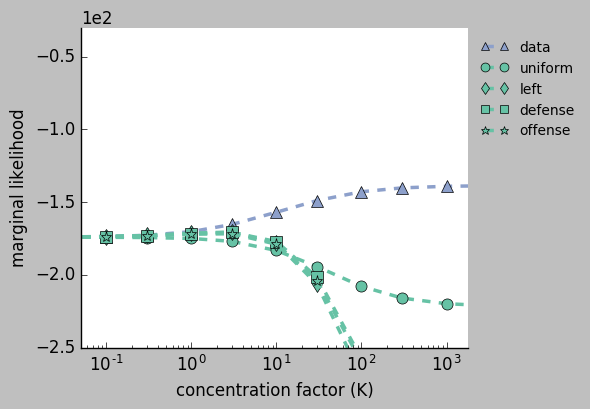

In [159]:
from importlib import reload
reload(p)
keys = ["data", "uniform", "left", "defense", "offense"]
fig, ax, leg = p.plot(exp, keys=keys, style=style, notebook=False, xlim=[0.05,1800], ylim=[-250, -30], size=size, leg_ncol=4, leg_size=(1,1), axis_labels=True)
fig.savefig("out/toy-nogroup.eps", bbox_inches='tight')
fig, ax, leg = p.plot(exp, keys=keys, style=style, notebook=True, xlim=[0.05,1800], ylim=[-250, -30], size=(5, 4))
fig

/media/data/content/systems/linux/home/.virtualenvs/analysis/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


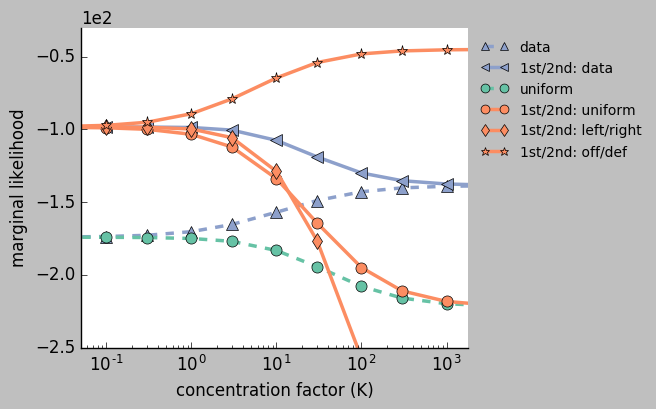

In [160]:
from importlib import reload
reload(p)
keys = ["data", "1st/2nd: data", "uniform", "1st/2nd: uniform", "1st/2nd: left/right", "1st/2nd: off/def"]
fig, ax, leg = p.plot(exp, keys=keys, style=style, notebook=False, xlim=[0.05,1800], ylim=[-250, -30], size=size, leg_ncol=4, leg_size=(1, 1))
fig.savefig("out/toy-12.eps", bbox_inches='tight')
fig, ax, leg = p.plot(exp, keys=keys, style=style, notebook=True, xlim=[0.05,1800], ylim=[-250, -30], size=(5, 4))
fig

/media/data/content/systems/linux/home/.virtualenvs/analysis/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


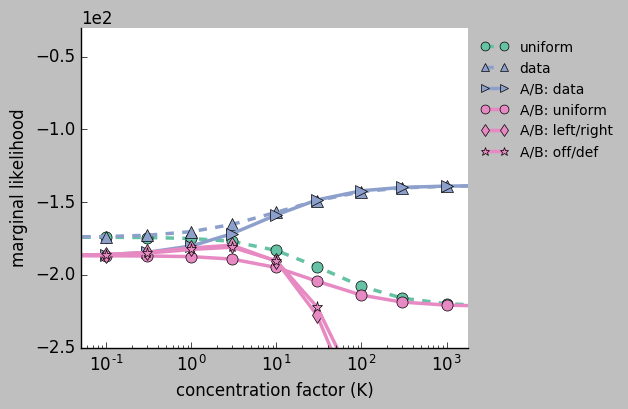

In [161]:
from importlib import reload
reload(p)
keys = ["uniform", "data","A/B: data", "A/B: uniform", "A/B: left/right", "A/B: off/def"]
fig, ax, leg = p.plot(exp, keys=keys, style=style, notebook=False, xlim=[0.05, 1800], ylim=[-250,-30], size=size, leg_ncol=4, leg_size=(1, 1))
fig.savefig("out/toy-ab.eps", bbox_inches='tight', dpi=320)
fig, ax, leg = p.plot(exp, keys=keys, style=style, notebook=True, xlim=[0.05,1800], ylim=[-250, -30], size=(5, 4))
fig